In [92]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import LeaveOneGroupOut, StratifiedShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import permutation_test_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from collections import Counter
from scipy import stats
%matplotlib inline

# Import dataset and preprocessing 

In [93]:
os.chdir("../2_Data")

In [94]:
df1 = pd.read_csv("Exp1_postpro.csv")
df2 = pd.read_csv("Exp2_postpro.csv")

In [95]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subj_idx          28800 non-null  int64  
 1   gender            28800 non-null  int64  
 2   year              28800 non-null  int64  
 3   education         28800 non-null  int64  
 4   dist              28800 non-null  float64
 5   trial_type        28800 non-null  object 
 6   rt                28661 non-null  float64
 7   response          28661 non-null  object 
 8   key_press         28661 non-null  object 
 9   condition         28800 non-null  object 
 10  correct_response  28800 non-null  object 
 11  correct           28800 non-null  bool   
 12  word              28800 non-null  object 
 13  Image             28800 non-null  object 
 14  shape_en          28800 non-null  object 
 15  valence           28800 non-null  object 
 16  ACC               28800 non-null  int64 

<AxesSubplot: >

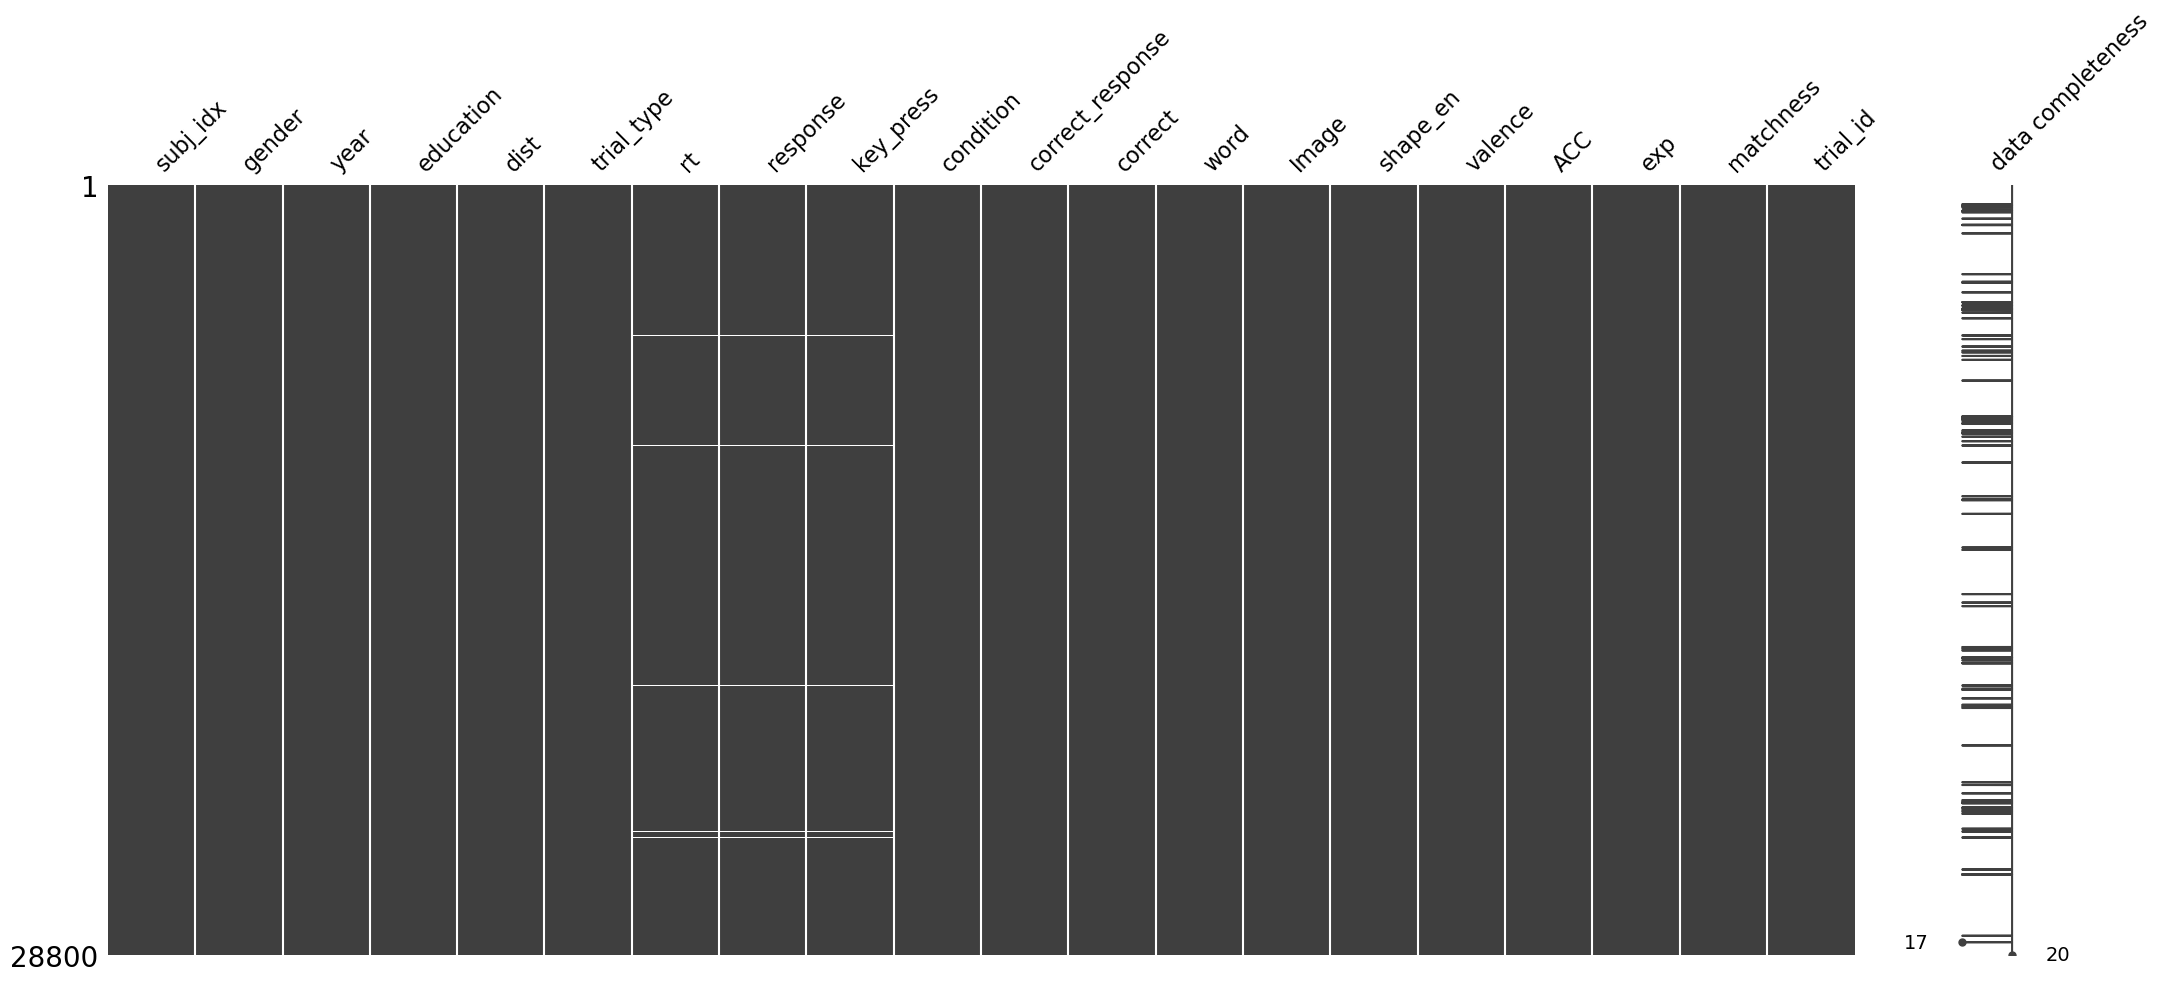

In [96]:
msno.matrix(df1, labels=True)

In [97]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subj_idx          28800 non-null  int64  
 1   gender            28800 non-null  int64  
 2   year              28800 non-null  int64  
 3   education         28800 non-null  int64  
 4   dist              28800 non-null  float64
 5   trial_type        28800 non-null  object 
 6   rt                28682 non-null  float64
 7   response          28682 non-null  object 
 8   key_press         28682 non-null  object 
 9   condition         28800 non-null  object 
 10  correct_response  28800 non-null  object 
 11  correct           28800 non-null  bool   
 12  word              28800 non-null  object 
 13  Image             28800 non-null  object 
 14  shape_en          28800 non-null  object 
 15  valence           28800 non-null  object 
 16  ACC               28800 non-null  int64 

<AxesSubplot: >

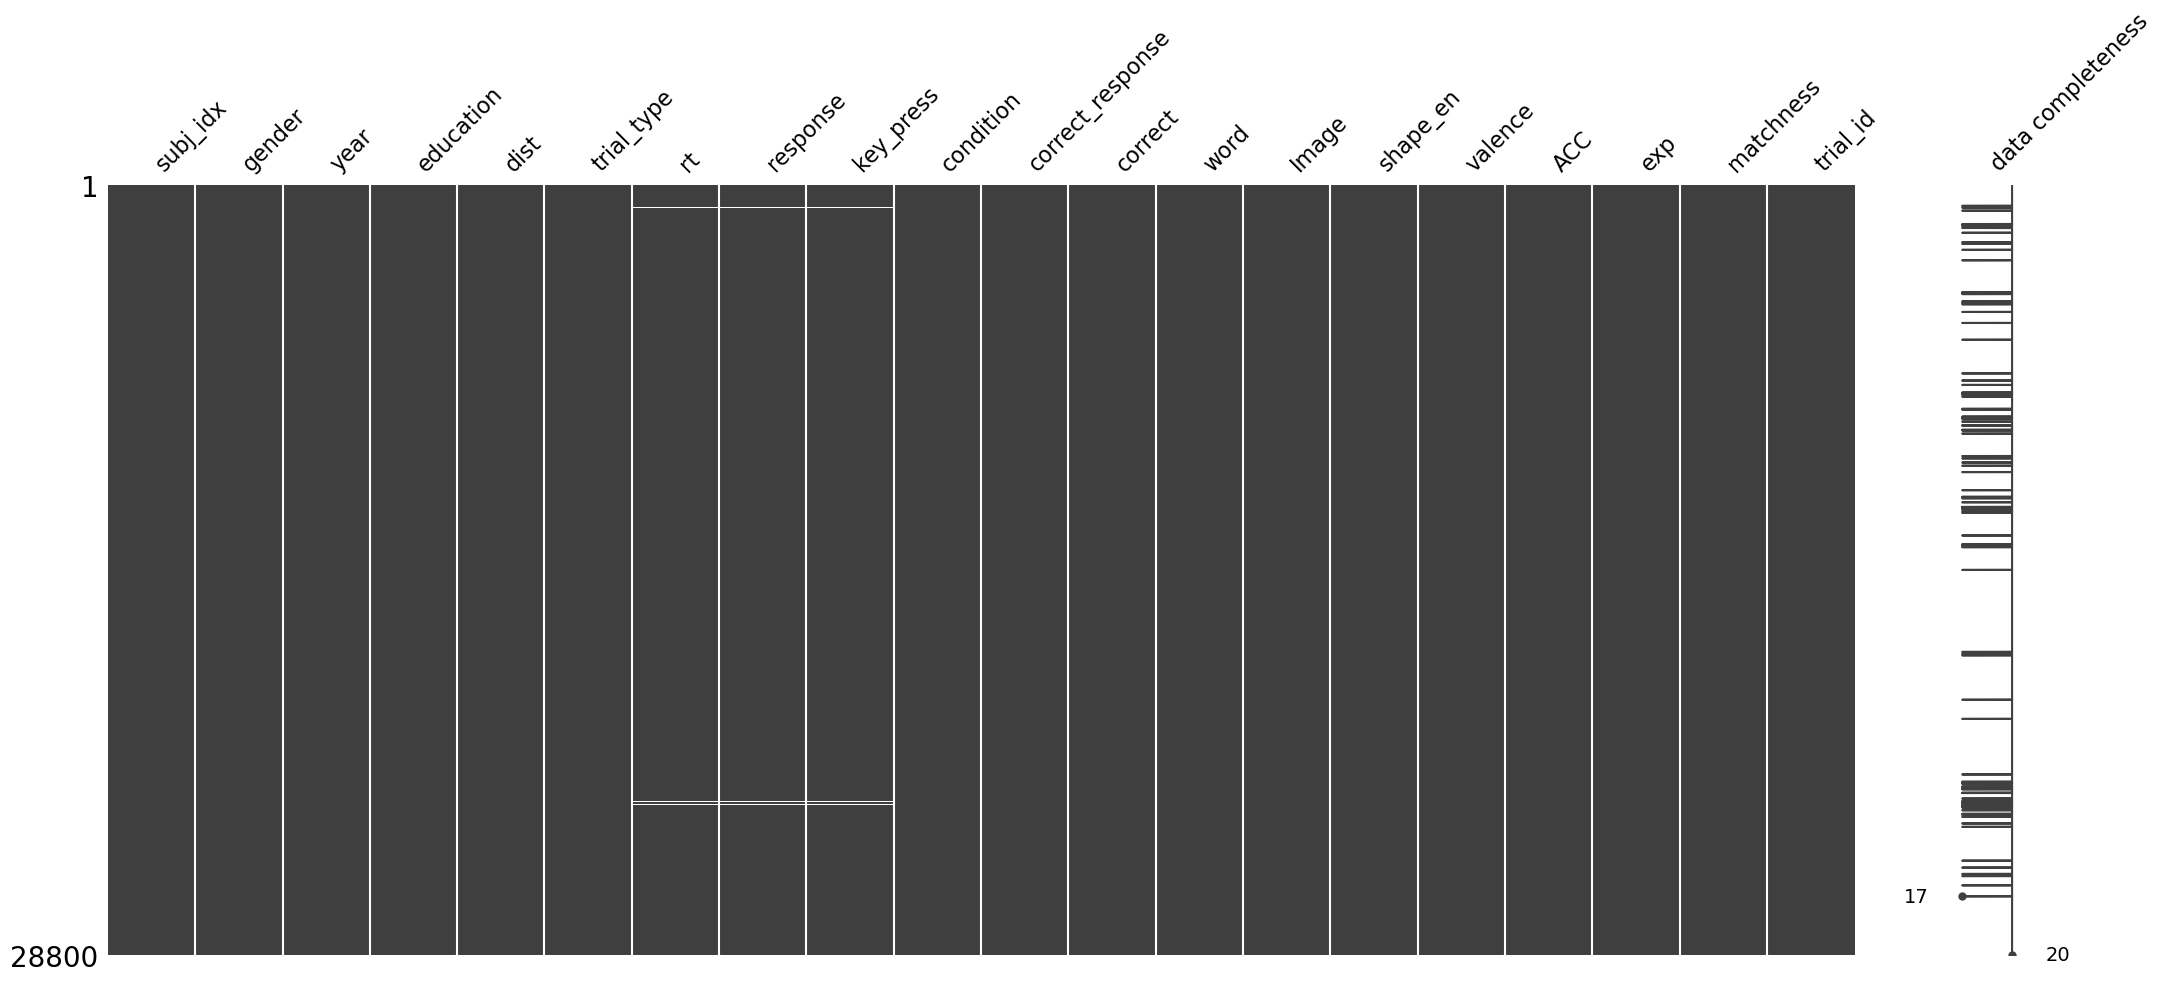

In [98]:
msno.matrix(df2, labels=True)

In [99]:
df1 = df1.dropna()

In [100]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28661 entries, 0 to 28799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subj_idx          28661 non-null  int64  
 1   gender            28661 non-null  int64  
 2   year              28661 non-null  int64  
 3   education         28661 non-null  int64  
 4   dist              28661 non-null  float64
 5   trial_type        28661 non-null  object 
 6   rt                28661 non-null  float64
 7   response          28661 non-null  object 
 8   key_press         28661 non-null  object 
 9   condition         28661 non-null  object 
 10  correct_response  28661 non-null  object 
 11  correct           28661 non-null  bool   
 12  word              28661 non-null  object 
 13  Image             28661 non-null  object 
 14  shape_en          28661 non-null  object 
 15  valence           28661 non-null  object 
 16  ACC               28661 non-null  int64 

In [101]:
df2 = df2.dropna()

In [102]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28682 entries, 0 to 28799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subj_idx          28682 non-null  int64  
 1   gender            28682 non-null  int64  
 2   year              28682 non-null  int64  
 3   education         28682 non-null  int64  
 4   dist              28682 non-null  float64
 5   trial_type        28682 non-null  object 
 6   rt                28682 non-null  float64
 7   response          28682 non-null  object 
 8   key_press         28682 non-null  object 
 9   condition         28682 non-null  object 
 10  correct_response  28682 non-null  object 
 11  correct           28682 non-null  bool   
 12  word              28682 non-null  object 
 13  Image             28682 non-null  object 
 14  shape_en          28682 non-null  object 
 15  valence           28682 non-null  object 
 16  ACC               28682 non-null  int64 

## Onehot Coding

In [103]:
onehot_v1 = pd.get_dummies(df1[["valence"]])

In [104]:
df1 = pd.concat([df1, onehot_v1], axis=1)

In [105]:
onehot_v2 = pd.get_dummies(df2[["valence"]])

In [106]:
df2 = pd.concat([df2, onehot_v2], axis=1)

In [107]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28661 entries, 0 to 28799
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subj_idx          28661 non-null  int64  
 1   gender            28661 non-null  int64  
 2   year              28661 non-null  int64  
 3   education         28661 non-null  int64  
 4   dist              28661 non-null  float64
 5   trial_type        28661 non-null  object 
 6   rt                28661 non-null  float64
 7   response          28661 non-null  object 
 8   key_press         28661 non-null  object 
 9   condition         28661 non-null  object 
 10  correct_response  28661 non-null  object 
 11  correct           28661 non-null  bool   
 12  word              28661 non-null  object 
 13  Image             28661 non-null  object 
 14  shape_en          28661 non-null  object 
 15  valence           28661 non-null  object 
 16  ACC               28661 non-null  int64 

In [108]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28682 entries, 0 to 28799
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subj_idx          28682 non-null  int64  
 1   gender            28682 non-null  int64  
 2   year              28682 non-null  int64  
 3   education         28682 non-null  int64  
 4   dist              28682 non-null  float64
 5   trial_type        28682 non-null  object 
 6   rt                28682 non-null  float64
 7   response          28682 non-null  object 
 8   key_press         28682 non-null  object 
 9   condition         28682 non-null  object 
 10  correct_response  28682 non-null  object 
 11  correct           28682 non-null  bool   
 12  word              28682 non-null  object 
 13  Image             28682 non-null  object 
 14  shape_en          28682 non-null  object 
 15  valence           28682 non-null  object 
 16  ACC               28682 non-null  int64 

## Split the data by condition

In [109]:
df1_sim = df1[df1.condition == "simultaneous"]
df1_word = df1[df1.condition == "word_first"]
df1_img = df1[df1.condition == "image_first"]

df2_sim = df2[df2.condition == "simultaneous"]
df2_word = df2[df2.condition == "word_first"]
df2_img = df2[df2.condition == "image_first"]

In [110]:
y1_sim = df1_sim["matchness"].values
y1_word = df1_word["matchness"].values
y1_img = df1_img["matchness"].values

y2_sim = df2_sim["matchness"].values
y2_word = df2_word["matchness"].values
y2_img = df2_img["matchness"].values

In [111]:
X1_sim = df1_sim[['rt', "ACC", "valence_circle", "valence_triangle", "valence_square"]].values
X1_word = df1_word[['rt', "ACC", "valence_circle", "valence_triangle", "valence_square"]].values
X1_img = df1_img[['rt', "ACC", "valence_circle", "valence_triangle", "valence_square"]].values

X2_sim = df2_sim[['rt', "ACC", "valence_Neutral", "valence_Bad", "valence_Good"]].values
X2_word = df2_word[['rt', "ACC", "valence_Neutral", "valence_Bad", "valence_Good"]].values
X2_img = df2_img[['rt', "ACC", "valence_Neutral", "valence_Bad", "valence_Good"]].values

# within sub, cross condition

## Exp1

In [112]:
groups1_img = df1_img["subj_idx"].values
groups1_word = df1_word["subj_idx"].values
groups1_sim = df1_sim["subj_idx"].values

### Image_first as source

In [113]:
df_result_si = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
for sub in np.unique(groups1_img):
    idx_sub = groups1_img == sub
    feature_sub_img = X1_img[idx_sub]
    label_sub_img = y1_img[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', random_state=123))
    score = cross_validate(logi, feature_sub_img, label_sub_img, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

    for ii, s in enumerate(score["test_score"]):#自己拟合自己测试
        df_result_si["sub"].append(sub)  
        df_result_si["score"].append(s)
        df_result_si["fold"].append(ii)
        df_result_si["source"].append("Image_first")
        df_result_si["target"].append("Image_first")
        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_w = y1_word[groups1_word == sub]
        y_pred_w = estimator.predict_proba(X1_word[groups1_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_result_si["sub"].append(sub)  
        df_result_si["score"].append(roc_w)
        df_result_si["fold"].append(ii)
        df_result_si["source"].append("Image_first")
        df_result_si["target"].append("Word_first")
        
        y_true_s = y1_sim[groups1_sim == sub]
        y_pred_s = estimator.predict_proba(X1_sim[groups1_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_result_si["sub"].append(sub)  
        df_result_si["score"].append(roc_s)
        df_result_si["fold"].append(ii)
        df_result_si["source"].append("Image_first")
        df_result_si["target"].append("Simultaneous")

df_result_si=pd.DataFrame(df_result_si)  

In [114]:
df_result_si

,sub,score,fold,source,target
0,1,0.760417,0,Image_first,Image_first
1,1,0.812500,1,Image_first,Image_first
2,1,0.744792,2,Image_first,Image_first
3,1,0.756076,3,Image_first,Image_first
4,1,0.823785,4,Image_first,Image_first
...,...,...,...,...,...
35995,40,0.461319,297,Image_first,Simultaneous
35996,40,0.451285,298,Image_first,Word_first
35997,40,0.468333,298,Image_first,Simultaneous
35998,40,0.457674,299,Image_first,Word_first


### Word_first as source

In [115]:
df_result_sw = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
for sub in np.unique(groups1_word):
    idx_sub = groups1_word == sub
    feature_sub_word = X1_word[idx_sub]
    label_sub_word = y1_word[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', random_state=123))
    score = cross_validate(logi, feature_sub_word, label_sub_word, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

    for ii, s in enumerate(score["test_score"]):#自己拟合自己测试
        df_result_sw["sub"].append(sub)  
        df_result_sw["score"].append(s)
        df_result_sw["fold"].append(ii)
        df_result_sw["source"].append("Word_first")
        df_result_sw["target"].append("Word_first")
        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_s = y1_sim[groups1_sim == sub]
        y_pred_s = estimator.predict_proba(X1_sim[groups1_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_result_sw["sub"].append(sub)  
        df_result_sw["score"].append(roc_s)
        df_result_sw["fold"].append(ii)
        df_result_sw["source"].append("Word_first")
        df_result_sw["target"].append("Simultaneous")
        
        y_true_i = y1_img[groups1_img == sub]
        y_pred_i = estimator.predict_proba(X1_img[groups1_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_result_sw["sub"].append(sub)  
        df_result_sw["score"].append(roc_i)
        df_result_sw["fold"].append(ii)
        df_result_sw["source"].append("Word_first")
        df_result_sw["target"].append("Image_first")

df_result_sw=pd.DataFrame(df_result_sw) 

In [116]:
df_result_sw

,sub,score,fold,source,target
0,1,0.716146,0,Word_first,Word_first
1,1,0.801215,1,Word_first,Word_first
2,1,0.650174,2,Word_first,Word_first
3,1,0.618056,3,Word_first,Word_first
4,1,0.812500,4,Word_first,Word_first
...,...,...,...,...,...
35995,40,0.545764,297,Word_first,Image_first
35996,40,0.545972,298,Word_first,Simultaneous
35997,40,0.451875,298,Word_first,Image_first
35998,40,0.543611,299,Word_first,Simultaneous


### Simultaneous as source

In [117]:
df_result_ss = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
for sub in np.unique(groups1_sim):
    idx_sub = groups1_sim == sub
    feature_sub_sim = X1_sim[idx_sub]
    label_sub_sim = y1_sim[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', random_state=123))
    score = cross_validate(logi, feature_sub_sim, label_sub_sim, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

    for ii, s in enumerate(score["test_score"]):#自己拟合自己测试
        df_result_ss["sub"].append(sub)  
        df_result_ss["score"].append(s)
        df_result_ss["fold"].append(ii)
        df_result_ss["source"].append("Simultaneous")
        df_result_ss["target"].append("Simultaneous")
        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y1_img[groups1_img == sub]
        y_pred_i = estimator.predict_proba(X1_img[groups1_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_result_ss["sub"].append(sub)  
        df_result_ss["score"].append(roc_i)
        df_result_ss["fold"].append(ii)
        df_result_ss["source"].append("Simultaneous")
        df_result_ss["target"].append("Image_first")
        
        y_true_w = y1_word[groups1_word == sub]
        y_pred_w = estimator.predict_proba(X1_word[groups1_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_result_ss["sub"].append(sub)  
        df_result_ss["score"].append(roc_w)
        df_result_ss["fold"].append(ii)
        df_result_ss["source"].append("Simultaneous")
        df_result_ss["target"].append("Word_first")

df_result_ss=pd.DataFrame(df_result_ss) 

In [118]:
df_result1 = pd.concat([df_result_ss, df_result_si, df_result_sw])

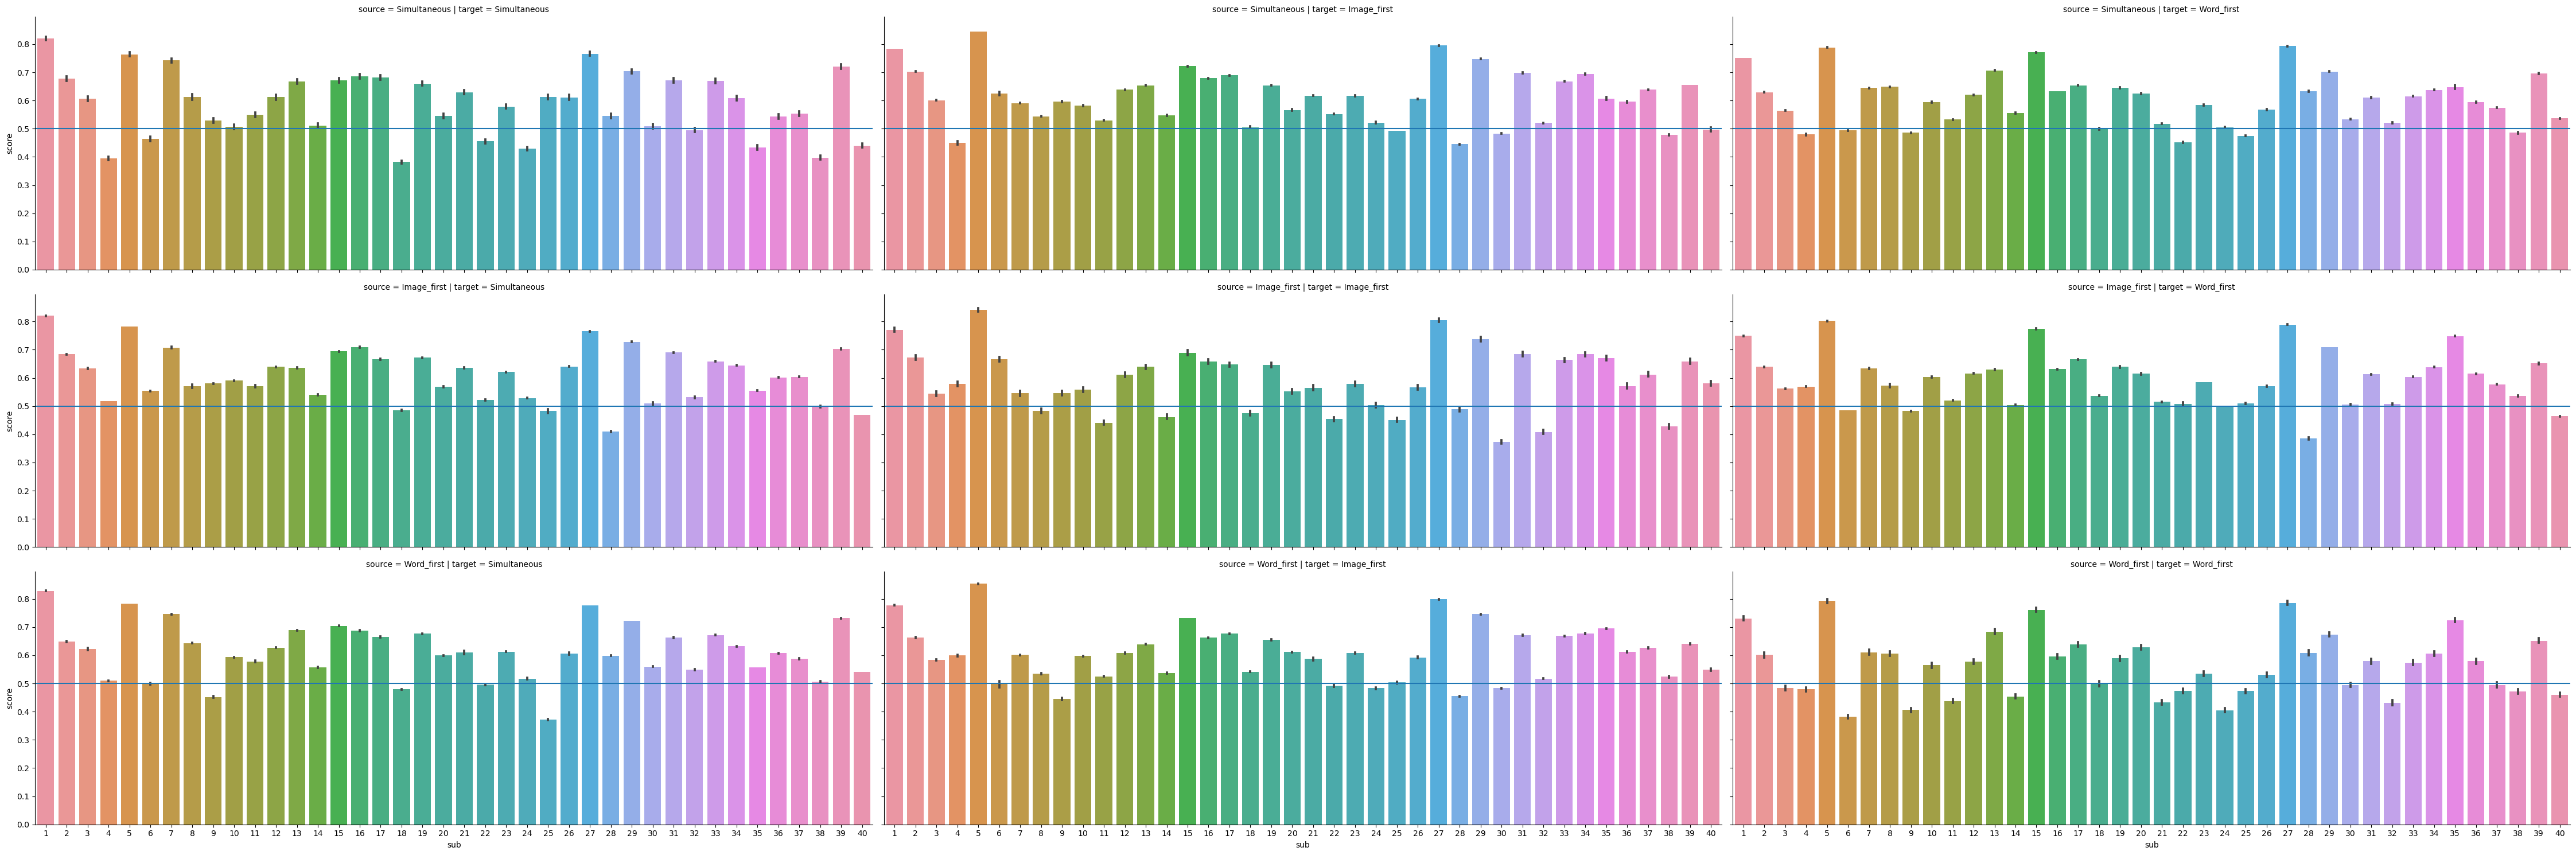

In [120]:
r1 = sns.catplot(x="sub", y="score", data=df_result1, row="source", col="target", aspect=3, kind="bar")
[ax.axhline(0.5) for ax in r1.axes.flatten()]
plt.savefig("barplot_cro_con.png",dpi=300)